In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the provided CSV file/data set: London Central, Inner, Outer London and bike sites.
london_central = pd.read_csv('L_centr_fnl_0.csv') 
london_inner = pd.read_csv('london_inner_cl.csv')
london_outer = pd.read_csv('london_outer_cl.csv')
london_sites = pd.read_csv('london_sites_cl.csv')

# Annual Dynamics: Central, Inner and Outer London.

In [3]:
# Aggregate by year number of cyclists in London Central.
lc_total = london_central \
 .groupby(['Year'])[['Number of private cycles' , 'Number of cycle hire bikes', 'Total_cycles']] \
 .sum() \
 .reset_index().sort_values(by=['Year'])

# View output.
lc_total

,Year,Number of private cycles,Number of cycle hire bikes,Total_cycles
0,2014,1436361,166636,1602997.0
1,2015,1466529,170614,1637143.0
2,2016,1542540,182302,1724842.0
3,2017,1545707,189648,1735355.0
4,2018,1685509,211673,1897182.0
5,2019,1687339,214662,1902001.0
6,2020,755388,101364,856752.0
7,2021,1119418,150541,1269959.0


In [4]:
# Aggregate by year number of cyclists in Inner London.
li_total = london_inner \
 .groupby(['Year'])[['Number of private cycles' , 'Number of cycle hire bikes', 'Total cycles']] \
 .sum() \
 .reset_index().sort_values(by=['Year'])

# View output.
li_total

,Year,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015,434028,15927,449955
1,2016,423995,17599,441594
2,2017,432193,18274,450467
3,2018,440194,20893,461087
4,2019,422343,23855,446198
5,2020,408488,20930,429418
6,2021,460848,15590,476438


In [5]:
# Aggregate by year number of cyclists in Outer London.
lo_total = london_outer \
 .groupby('Survey wave (year)') \
    [['Number of male cycles', 'Number of female cycles', 'Total cycles']].sum() \
 .reset_index().sort_values(by=['Survey wave (year)'])

# View output.
lo_total

,Survey wave (year),Number of male cycles,Number of female cycles,Total cycles
0,2015,69394,11677,82228
1,2016,68345,11449,80295
2,2017,71648,14384,86588
3,2018,77693,13704,91966
4,2019,68328,12968,82117
5,2020,63962,9649,74924
6,2021,82214,16570,99067


In [6]:
# Merge Centeal, Inner and Outer London data in one dataframe to create a visualization reflecting dynamics.
london = pd.merge(lc_total, li_total, on = 'Year')
london = pd.merge(london, lo_total, how='left', left_on=['Year'], right_on=['Survey wave (year)'])

# View the output.
london

,Year,Number of private cycles_x,Number of cycle hire bikes_x,Total_cycles,Number of private cycles_y,Number of cycle hire bikes_y,Total cycles_x,Survey wave (year),Number of male cycles,Number of female cycles,Total cycles_y
0,2015,1466529,170614,1637143.0,434028,15927,449955,2015,69394,11677,82228
1,2016,1542540,182302,1724842.0,423995,17599,441594,2016,68345,11449,80295
2,2017,1545707,189648,1735355.0,432193,18274,450467,2017,71648,14384,86588
3,2018,1685509,211673,1897182.0,440194,20893,461087,2018,77693,13704,91966
4,2019,1687339,214662,1902001.0,422343,23855,446198,2019,68328,12968,82117
5,2020,755388,101364,856752.0,408488,20930,429418,2020,63962,9649,74924
6,2021,1119418,150541,1269959.0,460848,15590,476438,2021,82214,16570,99067


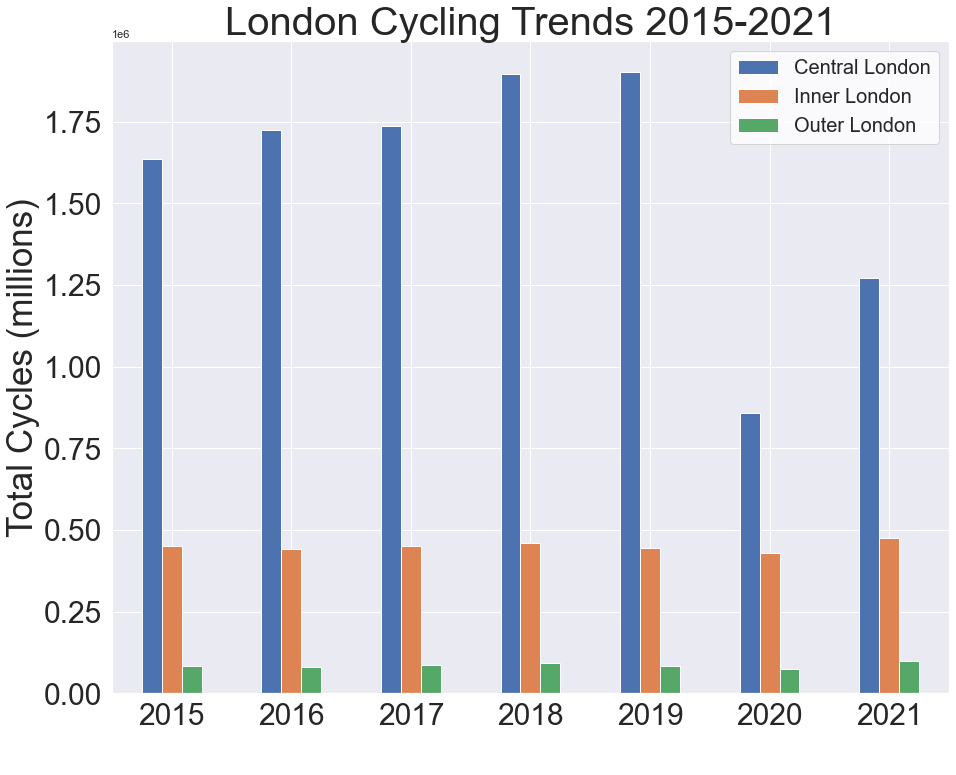

In [7]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})
# Set the plot style as darkgrid.
sns.set_style('darkgrid')

# Create a stacked barplot for total number of cyclists in different areas of London annual.
graph = london.plot(x='Year', y=['Total_cycles', 'Total cycles_x', 'Total cycles_y'], kind = 'bar', rot = 0)

# Annotate the axes, labels and ticks.
plt.legend(fontsize = 20, facecolor='white',
          labels=["Central London", "Inner London", "Outer London"])
plt.xlabel('Year', fontsize=35, color = 'white')
plt.ylabel('Total Cycles (millions)', size=35)
plt.title('London Cycling Trends 2015-2021', fontdict={'fontsize':40})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
i=0

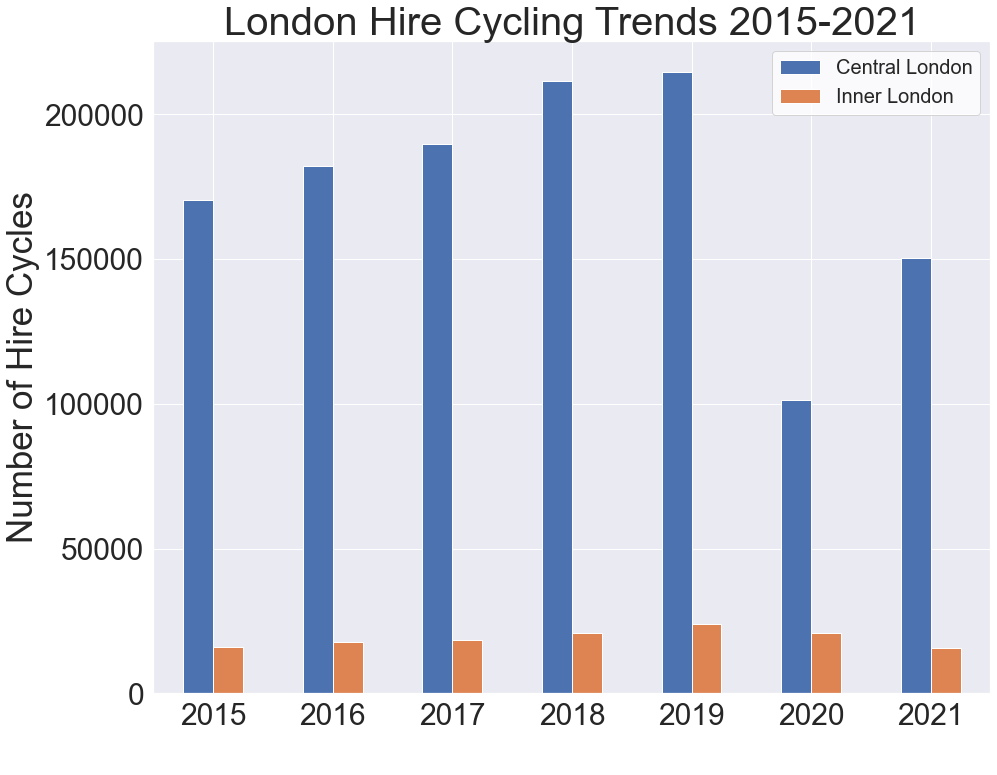

In [8]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})
# Set the plot style as darkgrid.
sns.set_style('darkgrid')

# Create a stacked barplot to see hired bikes dynamic
graph = london.plot(x='Year', y=['Number of cycle hire bikes_x', 'Number of cycle hire bikes_y'], kind = 'bar', rot = 0)

# Annotate the axes, labels and ticks.
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
graph.set_xlabel('Year', fontsize=35, color = 'white')
graph.set_ylabel('Number of Hire Cycles', fontsize=35)
graph.set_title("London Hire Cycling Trends 2015-2021", fontsize=40)
#sns.set_style('ticks',{'axes.grid' : True})
plt.legend(fontsize = 20, facecolor='white',
          labels=["Central London", "Inner London"])
i=0